In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')

## EDA

In [34]:
df = pd.read_csv('../data/diabetes_012_health_indicators_BRFSS2015.csv')
df.head(5)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [6]:
print(df.isnull().sum().sum())
print(df.isna().sum().sum())

0
0


dữ liệu không có NaN

In [6]:
# đếm số giá trị unique trong mỗi cột
df.nunique()

Diabetes_012             3
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
HeartDiseaseorAttack     2
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

hầu hết các biến trong dataset là biến nhị phân -> biến định tính       
các biến định tính không phải nhị phân bao gồm: Diabetes_012, GenHlth, Age, Education, Income       
các biến định lượng:  
- rời rạc: MentHlth, PhysHlth
- liên tục: BMI (trong dataset này thì được biểu diễn rời rạc)

In [5]:
# kiểm tra dữ liệu có bị trùng không
df.duplicated().sum()

23899

dữ liệu có ~24000 dòng bị trùng nhau, chiếm khoảng 9.5% dữ liệu gốc. Kiểm tra xem số dòng trùng nhau này rơi nhiều vào nhóm nào.

In [7]:
print("Before removing duplicates:")
print(df['Diabetes_012'].value_counts())

df1 = df.drop_duplicates()

print("After removing duplicates:")
print(df1['Diabetes_012'].value_counts())

Before removing duplicates:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64
After removing duplicates:
Diabetes_012
0.0    190055
2.0     35097
1.0      4629
Name: count, dtype: int64


Như vậy các dữ liệu trùng đa số rơi vào class 1, có thể thực hiện drop duplicate rows để giảm ảnh hưởng của các dữ liệu nhiễu trong class này với model.

### Phân phối của các biến

####  Biến định lượng

Vẽ biểu đồ phân phối và boxplot. 

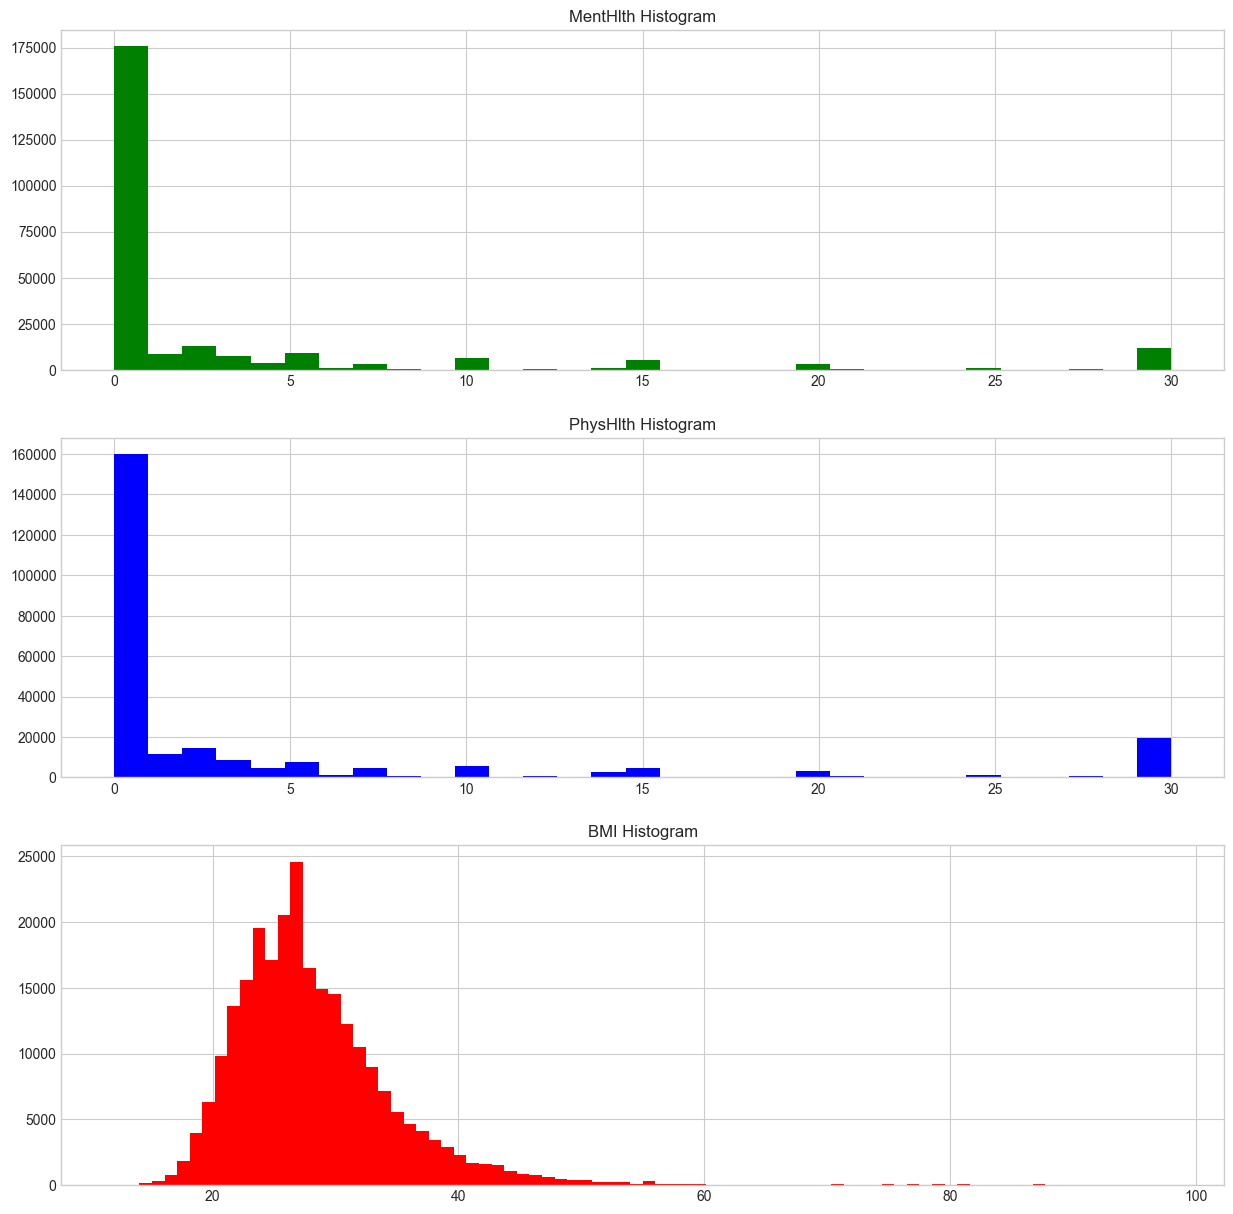

In [12]:
# ve tung bieu do density, histogram cho cac bien MentHlth, PhysHlth, BMI trong df 
plt.figure(figsize=(15, 15))
plt.subplot(3,1,1)
plt.hist(df['MentHlth'], bins=31, color='g')
plt.title('MentHlth Histogram')

plt.subplot(3,1,2)
plt.hist(df['PhysHlth'], bins=31, color='b')
plt.title('PhysHlth Histogram')

plt.subplot(3,1,3)
plt.hist(df['BMI'], bins=84, color='r')
plt.title('BMI Histogram')

plt.show()

MentHlth và PhysHlth chứa nhiều giá trị 0: phần lớn mọi người không có vấn đề về sức khỏe tinh thần và thể chất. 
Histogram cho 2 biến này đương tối tương đồng -> có thể có tương quan/ đa cộng tuyến giữa 2 biến này.       

Phân phối của cả 3 biến đang bị lệch phải. 

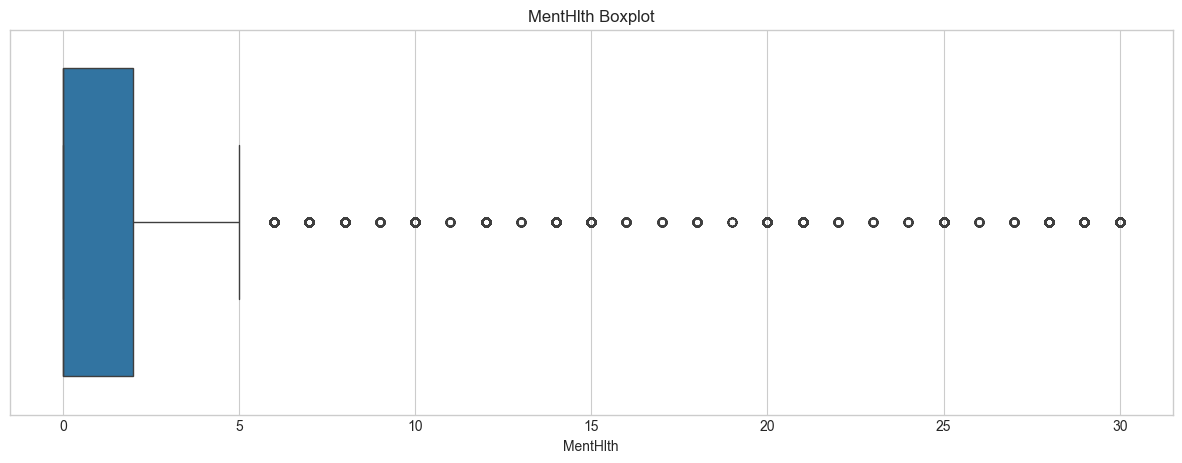

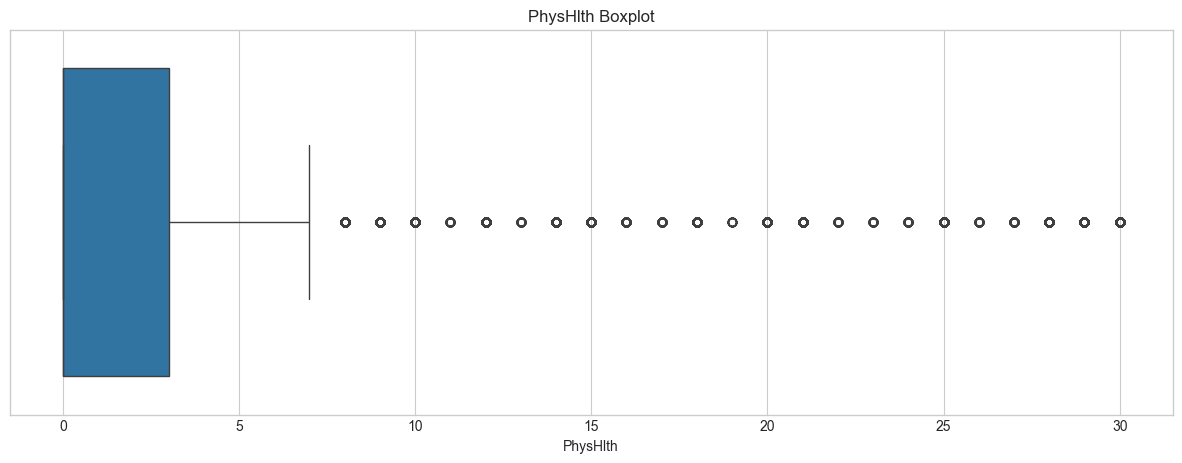

In [7]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='MentHlth', data=df, orient='h')
plt.title('MentHlth Boxplot')
plt.show()

plt.figure(figsize=(15, 5))
sns.boxplot(x='PhysHlth', data=df, orient='h')
plt.title('PhysHlth Boxplot')
plt.show()

đa phần quan sát gặp vấn đề về tinh thần và thể chất kéo dài < 10 ngày. Số ít (outlier) kéo dài >= 10 ngày.

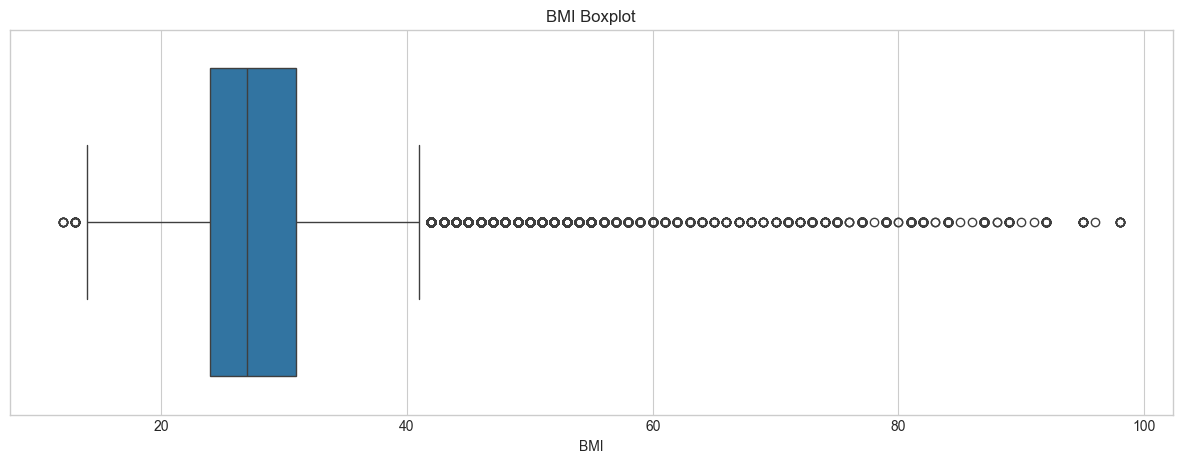

In [ ]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='BMI', data=df, orient='h')
plt.title('BMI Boxplot')
plt.show()

In [32]:
df['BMI'].describe()

count    253680.000000
mean         28.382364
std           6.608694
min          12.000000
25%          24.000000
50%          27.000000
75%          31.000000
max          98.000000
Name: BMI, dtype: float64

thông qua boxplot và bảng summary thì ta thấy rõ hơn được phân bố của BMI tập trung chủ yếu vào khoảng [24,31] với trung bình là 28 độ lệch là 6, và có nhiều outlier có BMI lớn.

**Tính tỉ lệ outliers:**

In [8]:
def percent_outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = np.sum((x < lower_bound) | (x > upper_bound))
    return outliers / len(x) * 100


print("BMI Outliers: {:.2f}%".format(percent_outliers(df['BMI'])))
print("Mental Health Outliers: {:.2f}%".format(percent_outliers(df['MentHlth'])))
print("Physical Health Outliers: {:.2f}%".format(percent_outliers(df['PhysHlth'])))

BMI Outliers: 3.88%
Mental Health Outliers: 14.27%
Physical Health Outliers: 16.14%


#### Biến định tính

Vẽ biểu đồ tần số.

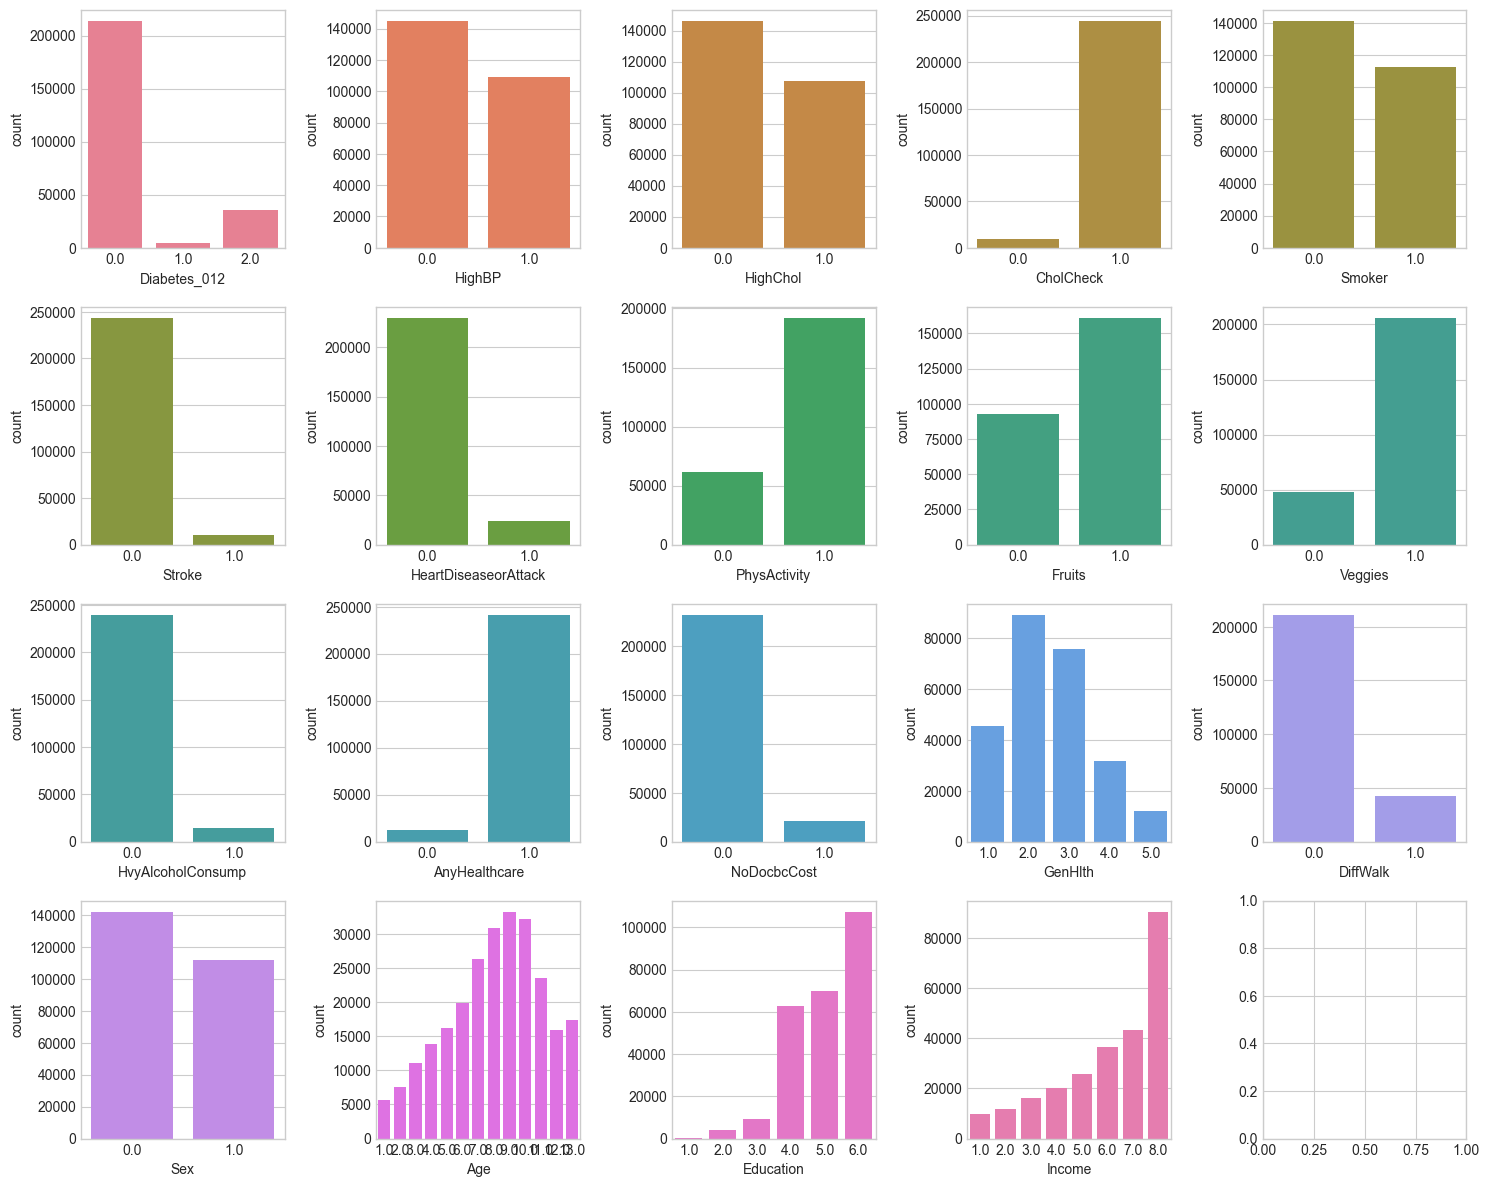

In [65]:
df2 = df.copy()
df2.drop(columns=['BMI','MentHlth','PhysHlth'], inplace=True)

fig, axes = plt.subplots(nrows=int(np.ceil(len(df2.columns)/5)), ncols=5, figsize=(15, 12))

colors = sns.color_palette('husl', len(df2.columns))

for ax, col, color in zip(axes.flatten(), df2.columns, colors):
    sns.countplot(x=col, data=df2, ax=ax, color=color)

plt.tight_layout()
plt.show()

dữ liệu cân bằng ở các biến (xấp xỉ 40-50%): HighBP, HighChol, Smoker, Sex.     
trên thực tế thì khả năng khảo sát được kết quả này là bình thường          
tỉ lệ sex cân bằng cũng cho thấy dữ liệu khảo sát đều trên cả 2 giới tính

**Dữ liệu mất cân bằng trong biến dự đoán Diabetes_012, cụ thể là tỉ lệ người không bị tiểu đường nhiều >> tỉ lệ người bị tiểu đường và tiền tiểu đường**

Kiểm tra tỉ lệ cho biến dự đoán tiểu đường:

In [9]:
diabetes_percentages = df['Diabetes_012'].value_counts(normalize=True) * 100

diabetes_percentages_df = diabetes_percentages.reset_index()
diabetes_percentages_df.columns = ['Diabetes_Status', 'Percentage']

diabetes_percentages_df = diabetes_percentages_df.sort_values(by='Diabetes_Status', ascending=True)

print(diabetes_percentages_df)

   Diabetes_Status  Percentage
0              0.0   84.241170
2              1.0    1.825528
1              2.0   13.933302


Ở đây tỉ lệ trong nhóm 0 (Không bị tiểu đường) chiếm đến 84%, trong khi nhóm 1 chiếm chưa tới 2%.       
=> **Dữ liệu bị mất cân bằng nặng.** 

Các biến khác:
- Đa số các quan sát đã kiểm tra cholesterol trong 5 năm, chỉ một số ít chưa kiểm tra.
- Số lượng quan sát từng bị đột quỵ hoặc bị nhồi máu cơ tim thấp.
- Đa số quan sát có hoạt động thể chất trong vòng 30 ngày gần đây, khoảng hơn 1/5 quan sát là không.
- Số người ăn trái cây ít nhất một ngày gần gấp đôi số người không.
- Đa số các quan sát ăn rau củ quả mỗi ngày, chiếm hơn 4/5 toàn bộ quan sát.
- Đa số các quan sát không uống nhiều rượu.
- Đa số các quan sát đã tiếp cận các dịch vụ sức khỏe.
- Một số ít quan sát (khoảng dưới 50.000) không gặp bác sĩ trong vòng 12 tháng vì không có kinh phí.
- Đa số các tình trạng sức khỏe chung của quan sát đều ở mức Very Good (nhãn 2) và Good (nhãn 3).
- Có khoảng gần 50.000 quan sát gặp tình trạng khó khăn trong đi lại.
- Trình độ học vấn quan sát được trong mẫu ở mức 4,5,6 nhiều (6 là cao nhất) => **cân nhắc gộp nhãn hiếm (1,2,3)** 
- Thu nhập ở mức 8 (cao nhất) cũng có số lượng cao nhất và giảm dần ở các mức còn lại. 


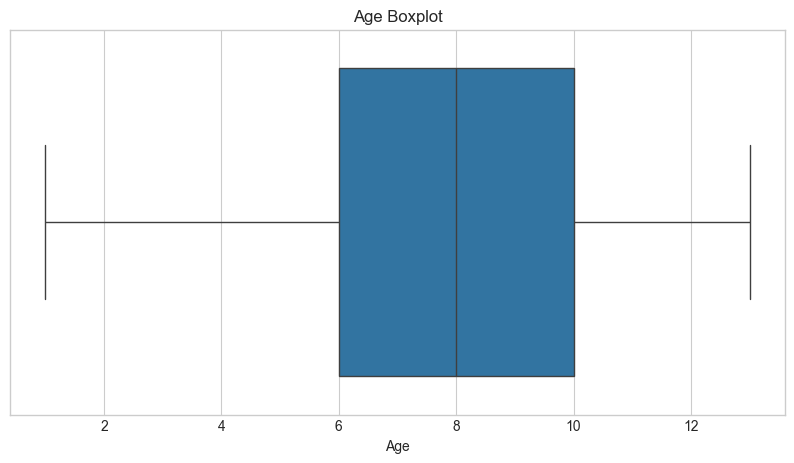

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Age', data=df, orient='h')
plt.title('Age Boxplot')
plt.show()

phần lớn các quan sát nằm trong **nhóm** tuổi từ 6-10, với nhóm 1 có độ tuổi từ 18-24, nhóm 2 từ 25-29, nhóm 3 từ 30-34,... thì mẫu này chứa nhiều quan sát trong nhóm tuổi từ 45-69.

**Tổng quan**: Đa số các quan trắc trong dataset này nằm trong độ tuổi trung niên, có thu nhập khá tốt và cũng có lối sống lành mạnh. Qua đó cũng quan sát thấy số lượng các quan trắc không bị bệnh tiểu đường cũng chiếm đa số. 

Các yếu tố được quan sát và khả năng mắc bệnh tiểu đường có thể liên quan với nhau. 


### Correlation

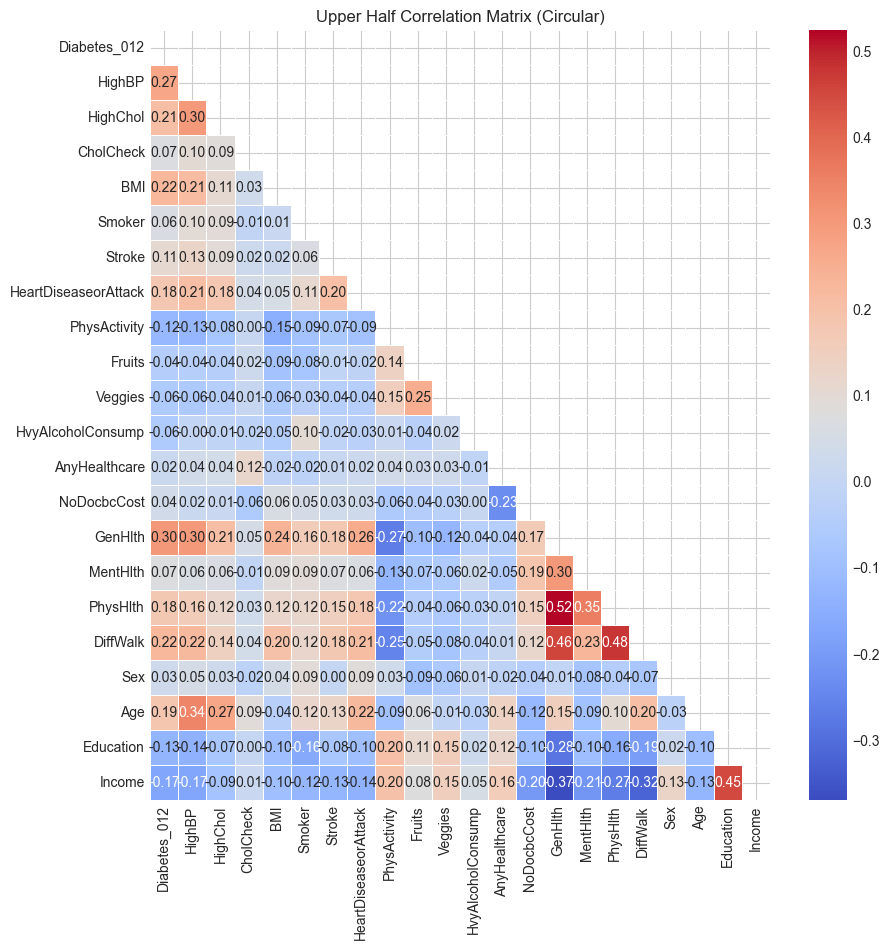

In [36]:
corr = df.corr()
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 10))

# Draw the heatmap with the mask
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)

plt.title('Upper Half Correlation Matrix (Circular)')
plt.show()


Một số biến trong dataset có tương quan mạnh với nhau:
- (GenHlth, PhysHlth), (PhysHlth, DiffWalk), (Education, Income), (GenHlth, DiffWalk), (MenthHlth, PhysHlth): tương quan thuận
- (GenHlth, Income), (DiffWalk, Income): tương quan nghịch

Tương quan của các biến với biến Diabetes_012

<Axes: title={'center': 'Correlation with Diabetes_binary'}>

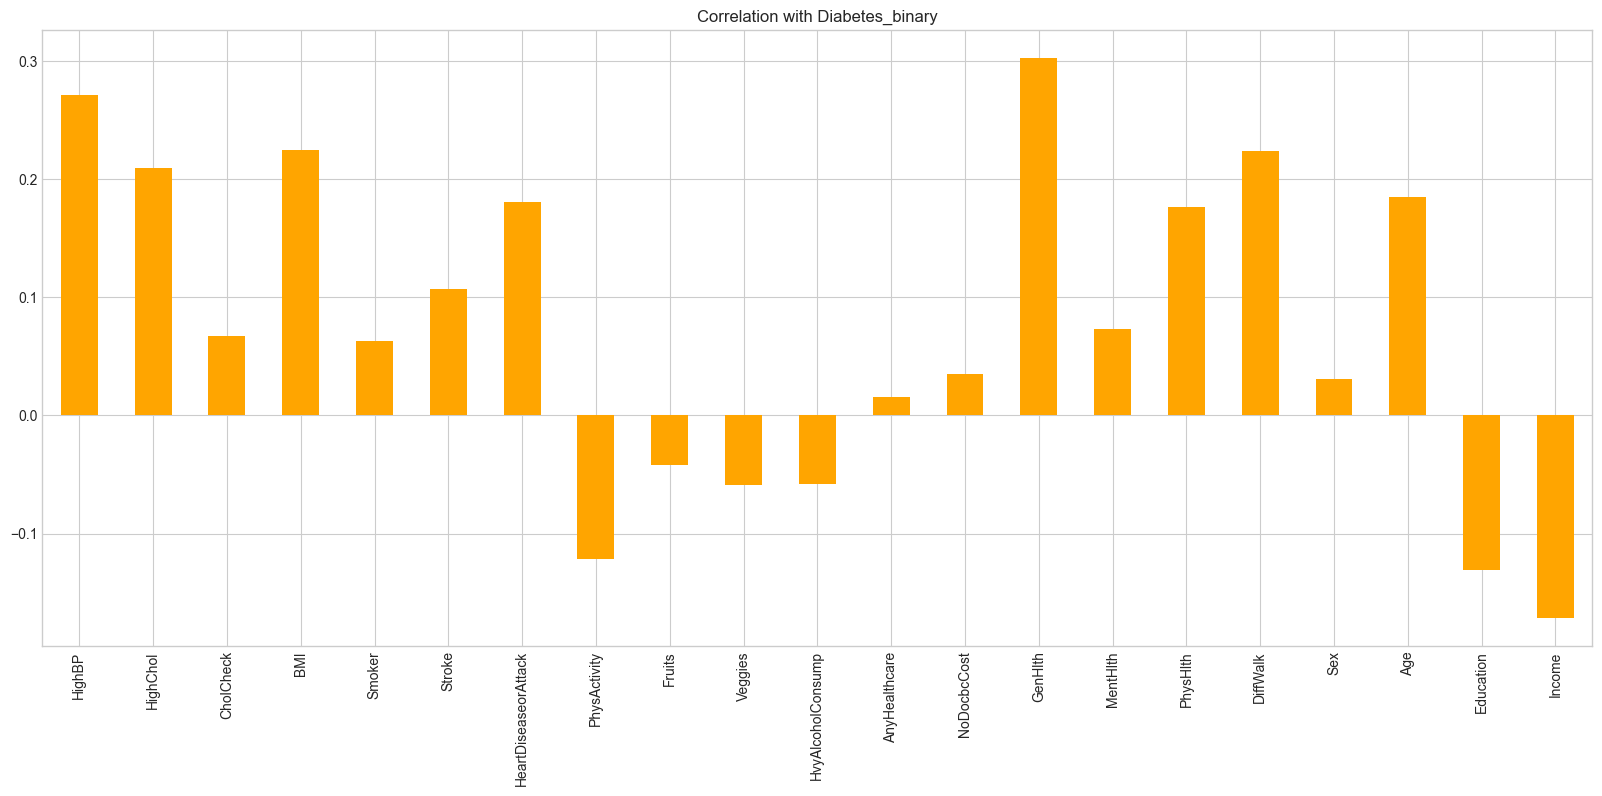

In [5]:
df.drop('Diabetes_012', axis=1).corrwith(df.Diabetes_012).plot(kind='bar', grid=True, figsize=(20, 8),\
                                                                      title="Correlation with Diabetes_binary",color="Orange")


**Các biến có tương quan nhiều với biến dự đoán:** HighBP, HighChol, BMI, CholCheck, Stroke, HeartDiseaseorAttack, PhysActivity, GenHlth, PhysHlth, DiffWalk, Age, Education, Income. 

### Quan hệ của các biến giải thích với biến dự đoán

#### Biến nhị phân

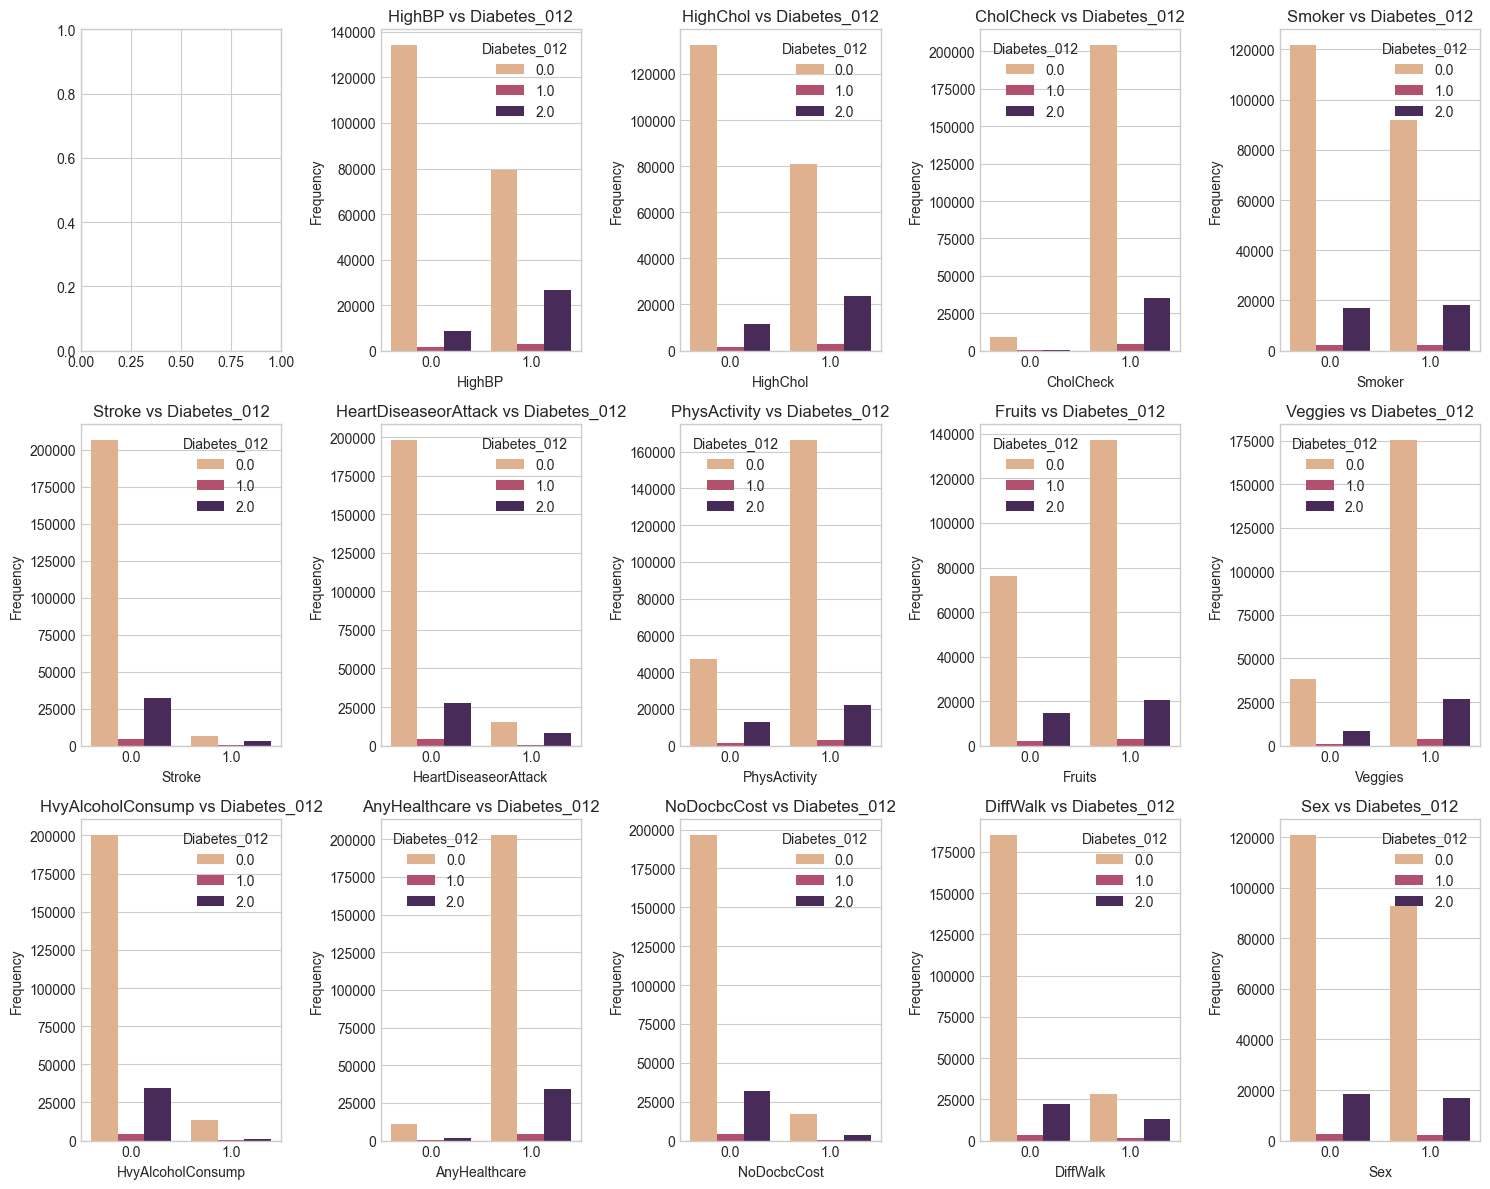

In [22]:
df2 = df.copy()
for col in df2.columns:
    if df2[col].nunique() != 2 and col != 'Diabetes_012':
        df2.drop(col, axis=1, inplace=True)

fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 12))
i = 1

for ax, col in zip(axes.flatten(), df2.columns):
    if col != 'Diabetes_012':
        sns.countplot(x=col, hue='Diabetes_012', data=df2, ax=ax, palette='flare') 
        ax.set_title(f'{col} vs Diabetes_012')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# tính tỉ lệ phần trăm của biến Diabetes_012 theo các biến nhị phân 
# lưu các kết quả vào 1 dataframe mới
results = []

for col in df2.columns:
    if col != 'Diabetes_012':
        result = df2.groupby(col)['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0)
        result.reset_index(inplace=True)
        result.columns = ['Name', 'No Diabetes', 'Pre Diabetes', 'Diabetes']
        result.Name = [col + '_0', col + '_1']
        results.append(result)

results_df = pd.concat(results, axis=0)
results_df.reset_index(drop=True, inplace=True)
results_df.head()

,Name,No Diabetes,Pre Diabetes,Diabetes
0,HighBP_0,0.927788,0.011860,0.060352
1,HighBP_1,0.728776,0.026767,0.244457
2,HighChol_0,0.908166,0.012020,0.079814
3,HighChol_1,0.753130,0.026722,0.220149
4,CholCheck_0,0.968004,0.006547,0.025449


In [45]:
# nếu tỉ lệ phần trăm của cột 'No Diabetes' chênh lệch nhiều hơn 10% khi so sánh mỗi 2 dòng thì in ra tên của biến đó
for i in range(0, len(results_df), 2):
    if abs(results_df.loc[i, 'No Diabetes'] - results_df.loc[i+1, 'No Diabetes']) > 0.1:
        print(results_df.loc[i, 'Name'][:-2])

HighBP
HighChol
CholCheck
Stroke
HeartDiseaseorAttack
PhysActivity
DiffWalk


=> các biến trên có ảnh hưởng đến khả năng mắc bệnh tiểu đường (cần kiểm định)

#### Các biến định tính còn lại
 GenHlth, Age, Education, Income

Diabetes_012       0.0       1.0       2.0
GenHlth                                   
1.0           0.967924  0.006910  0.025166
2.0           0.914743  0.013628  0.071629
3.0           0.799262  0.022843  0.177894
4.0           0.657428  0.032468  0.310105
5.0           0.592004  0.029054  0.378942


Text(0.5, 1.0, 'Relation b/w GenHlth and Diabetes')

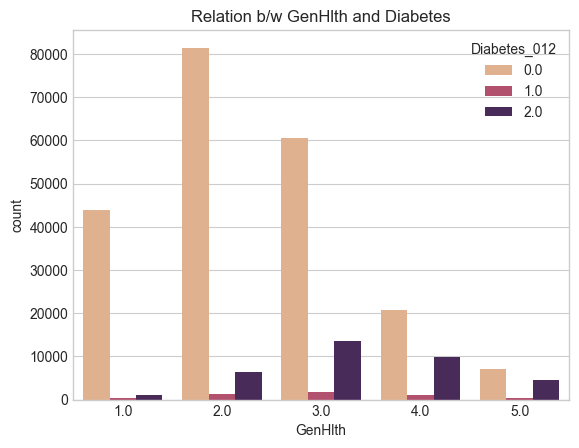

In [ ]:
# GenHlth
print(df.groupby('GenHlth')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["GenHlth"] ,data = df ,  hue = "Diabetes_012", palette='flare')   
plt.title("Relation b/w GenHlth and Diabetes")

Các trường hợp có sức khỏe Excellent (nhãn 1) và Very Good (nhãn 2) thì ít khả năng mắc bệnh tiểu đường. Ngược lại thì với nhãn 4 và 5 thì xác suất mắc bệnh tiểu đường khá cao. 

Diabetes_012       0.0       1.0       2.0
Age                                       
1.0           0.982632  0.003684  0.013684
2.0           0.974467  0.007107  0.018426
3.0           0.965297  0.006473  0.028230
4.0           0.944440  0.010273  0.045287
5.0           0.924862  0.010089  0.065049
6.0           0.896362  0.015742  0.087895
7.0           0.866763  0.015885  0.117352
8.0           0.843896  0.017839  0.138265
9.0           0.806431  0.021117  0.172452
10.0          0.774647  0.021650  0.203703
11.0          0.755960  0.025581  0.218459
12.0          0.759199  0.027847  0.212954
13.0          0.789092  0.026090  0.184818


Text(0.5, 1.0, 'Relation b/w Age and Diabetes')

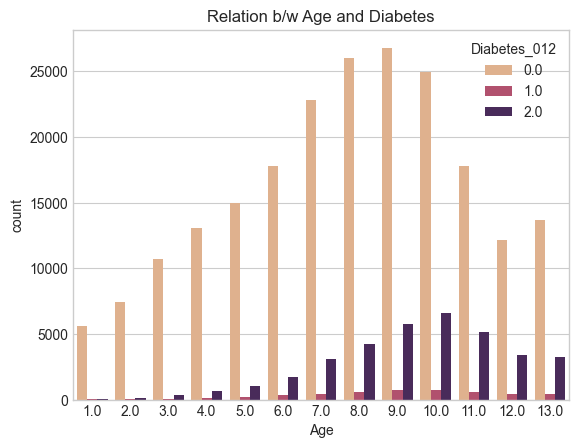

In [18]:
# Age 
print(df.groupby('Age')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["Age"] ,data = df ,  hue = "Diabetes_012", palette='flare')
plt.title("Relation b/w Age and Diabetes")

Dữ liệu quan sát được đa số quan trắc nằm trong nhóm tuổi từ 6-10. Khả năng mắc bệnh tiểu đường trong nhóm này tăng dần theo độ tuổi. Khả năng mắc bệnh ở nhóm 11 và 12 không tăng và giảm ở nhóm 13. 

Diabetes_012       0.0       1.0       2.0
Education                                 
1.0           0.718391  0.011494  0.270115
2.0           0.667574  0.039822  0.292605
3.0           0.724625  0.033129  0.242245
4.0           0.802135  0.021514  0.176351
5.0           0.832828  0.019067  0.148105
6.0           0.889392  0.013706  0.096902


Text(0.5, 1.0, 'Relation b/w Education and Diabetes')

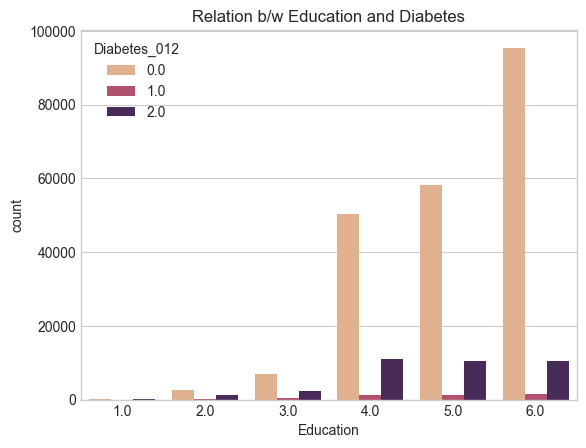

In [19]:
# Education
print(df.groupby('Education')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["Education"] ,data = df ,  hue = "Diabetes_012", palette='flare')
plt.title("Relation b/w Education and Diabetes")

Khả năng mắc bệnh tiểu đường có xu hướng giảm dần từ nhóm có trình độ học vấn thấp đến trình độ học vấn cao. 

(Số lượng người được khảo sát có trình độ học vấn từ 1->3 ở đây đang rất ít só với các nhóm còn lại nên có thể chưa phản ánh chính xác)

Diabetes_012       0.0       1.0       2.0
Income                                    
1.0           0.725104  0.032005  0.242891
2.0           0.707884  0.030213  0.261903
3.0           0.750594  0.026322  0.223084
4.0           0.775863  0.022796  0.201341
5.0           0.803307  0.022679  0.174014
6.0           0.834412  0.020510  0.145078
7.0           0.861172  0.017006  0.121821
8.0           0.909211  0.011185  0.079604


Text(0.5, 1.0, 'Relation b/w Income and Diabetes')

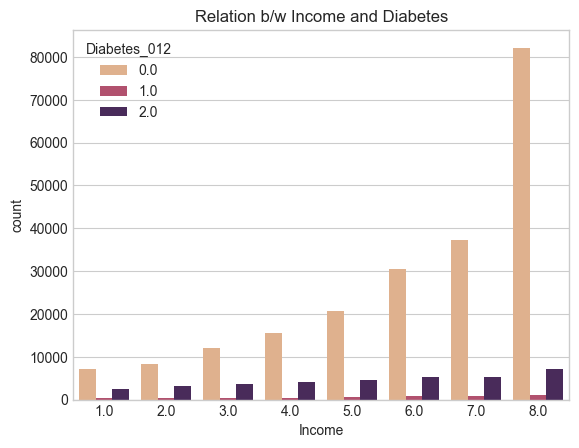

In [20]:
# Income
print(df.groupby('Income')['Diabetes_012'].value_counts(normalize=True).unstack().fillna(0))
sns.countplot(x = df["Income"] ,data = df ,  hue = "Diabetes_012", palette='flare')
plt.title("Relation b/w Income and Diabetes")

Khả năng bị bệnh tiểu đường cũng có xu hướng giảm dần từ nhóm có thu nhập thấp đến nhóm có thu nhập cao.

Do đã quan sát thấy Education và Income có tương quan thuận, nên xu hướng cho 2 biến này lên biến phụ thuộc giống nhau. 

#### Biến định lượng

BMI, MentHlth, PhysHlth,

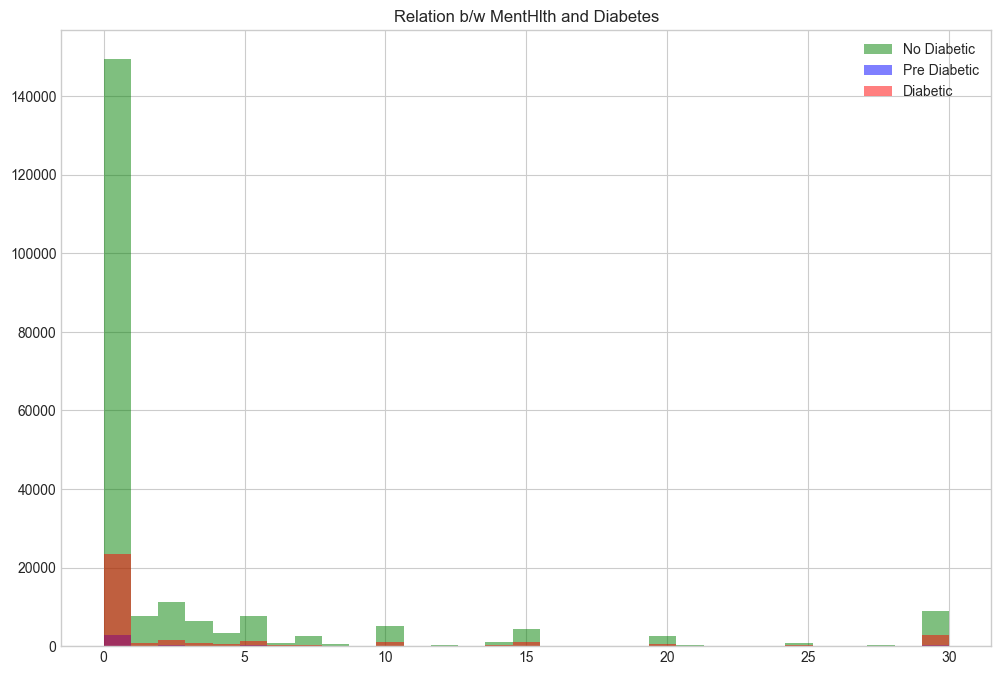

In [7]:
plt.figure(figsize=(12, 8))

plt.hist(df.MentHlth[df.Diabetes_012 == 0], bins=31, color="g", label="No Diabetic", alpha = 0.5)
plt.hist(df.MentHlth[df.Diabetes_012 == 1], bins=31, color="b", label="Pre Diabetic", alpha = 0.5)
plt.hist(df.MentHlth[df.Diabetes_012 == 2], bins=31, color="r", label="Diabetic", alpha = 0.5)

plt.title("Relation b/w MentHlth and Diabetes")
plt.legend()
plt.show()

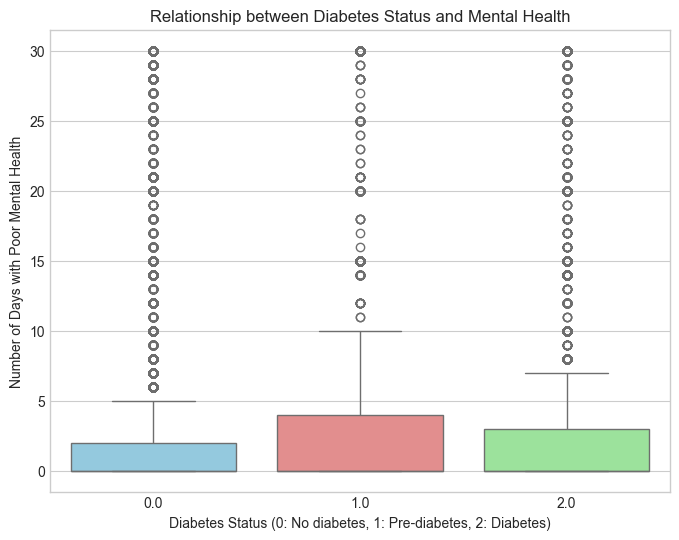

In [16]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_012', y='MentHlth', hue='Diabetes_012', data=df, palette=['skyblue', 'lightcoral', 'lightgreen'], legend=False)
plt.title('Relationship between Diabetes Status and Mental Health')
plt.xlabel('Diabetes Status (0: No diabetes, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('Number of Days with Poor Mental Health')
plt.show()

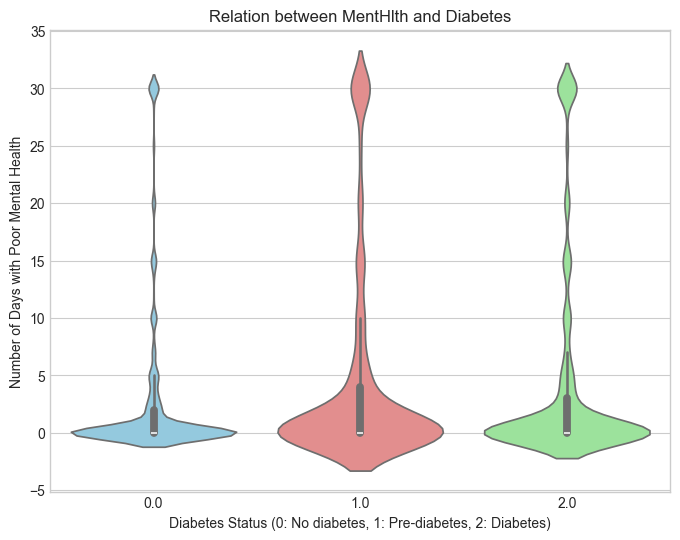

In [15]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diabetes_012', y='MentHlth', data=df, hue='Diabetes_012', palette=['skyblue', 'lightcoral', 'lightgreen'], legend=False)
plt.title('Relation between MentHlth and Diabetes')
plt.xlabel('Diabetes Status (0: No diabetes, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('Number of Days with Poor Mental Health')
plt.show()

phân phối cho MentHlth khá đều trong các trường hợp về bệnh tiểu đường.         
Đa số người không bị tiểu đường thì gặp vấn đề sức khỏe tinh thần kéo dài dưới 5 ngày.          
Những người không gặp vấn đề tâm lí (MentHlth=0) vẫn có khả năng mắc tiểu đường hoặc không, giá trị trung bình cho cả 3 boxplot đều là 0.  

Với biểu đồ violin thì quan sát thấy số người bị tiểu đường có vấn đề sức khỏe tinh thần trong khoảng 30 ngày liên tục nhiều hơn so với nhóm không bị tiểu đường. 


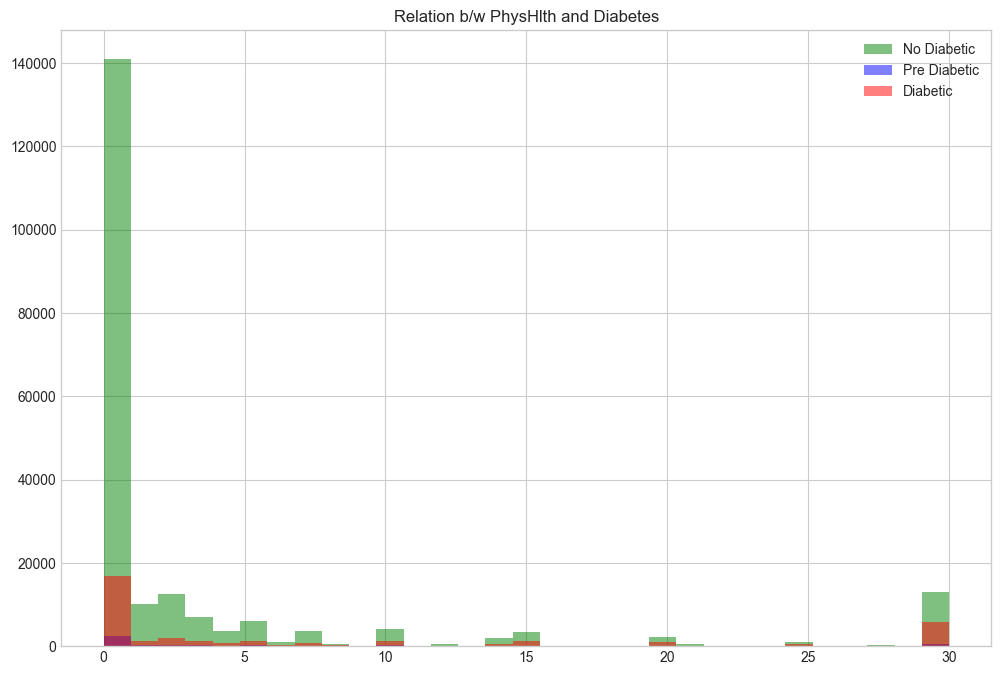

In [6]:
plt.figure(figsize=(12, 8))

plt.hist(df.PhysHlth[df.Diabetes_012 == 0], bins=31, color="g", label="No Diabetic", alpha = 0.5)
plt.hist(df.PhysHlth[df.Diabetes_012 == 1], bins=31, color="b", label="Pre Diabetic", alpha = 0.5)
plt.hist(df.PhysHlth[df.Diabetes_012 == 2], bins=31, color="r", label="Diabetic", alpha = 0.5)

plt.title("Relation b/w PhysHlth and Diabetes")
plt.legend()
plt.show()

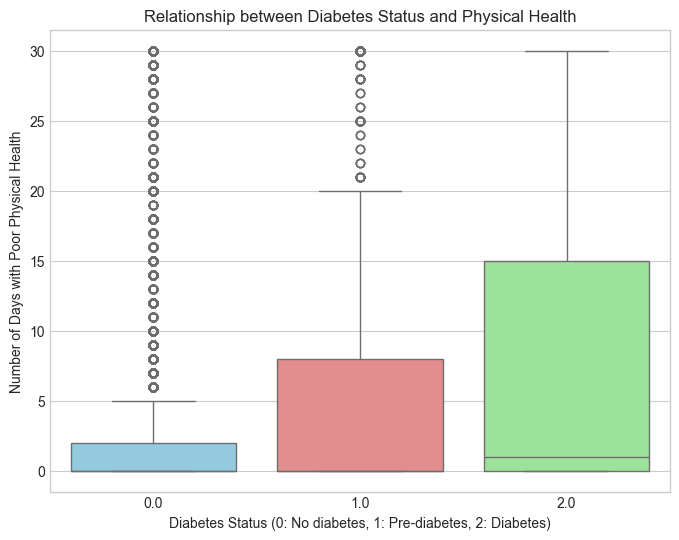

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Diabetes_012', y='PhysHlth', data=df, hue='Diabetes_012', palette=['skyblue', 'lightcoral', 'lightgreen'], legend=False)
plt.title('Relationship between Diabetes Status and Physical Health')
plt.xlabel('Diabetes Status (0: No diabetes, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('Number of Days with Poor Physical Health')
plt.show()

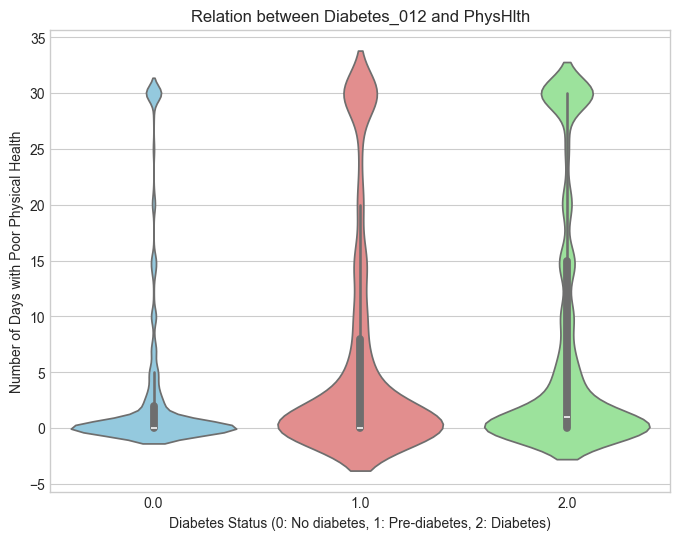

In [18]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diabetes_012', y='PhysHlth', data=df, hue='Diabetes_012', palette=['skyblue', 'lightcoral', 'lightgreen'], legend=False)
plt.title('Relation between Diabetes_012 and PhysHlth')
plt.xlabel('Diabetes Status (0: No diabetes, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('Number of Days with Poor Physical Health')
plt.show()

phân phối cho PhysHlth đã cho sự chênh lệch nhất định.      
Đa số người không bị tiểu đường cũng gặp vấn đề sức khỏe thể chất < 5 ngày.         
Phân phối của nhóm người tiền tiểu đường trải dài hơn gần như gấp đôi so với MentHlth.          
Phân phối của nhóm người bị tiểu đường trải dài hết vùng giá trị của PhysHlth và không có outliers, trung bình cho nhóm này cũng đã bị kéo lên không còn ở 0. 


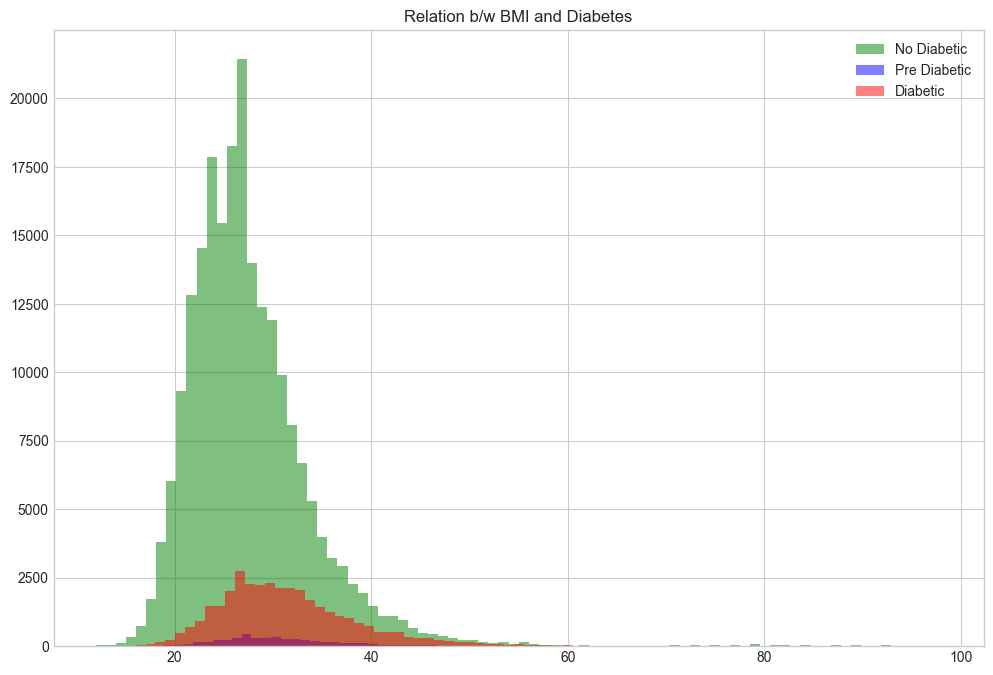

In [5]:
# BMI
plt.figure(figsize=(12, 8))

plt.hist(df.BMI[df.Diabetes_012 == 0], bins=84, color="g", label="No Diabetic", alpha=0.5)
plt.hist(df.BMI[df.Diabetes_012 == 1], bins=84, color="b", label="Pre Diabetic", alpha=0.5)
plt.hist(df.BMI[df.Diabetes_012 == 2], bins=84, color="r", label="Diabetic", alpha=0.5)

plt.title("Relation b/w BMI and Diabetes")
plt.legend()
plt.show()

In [19]:
df.groupby('Diabetes_012')['BMI'].describe()

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,,,,,,,,
0.0,213703.0,27.742521,6.260993,12.0,24.0,27.0,30.0,98.0
1.0,4631.0,30.724466,6.964898,13.0,26.0,30.0,34.0,96.0
2.0,35346.0,31.944011,7.363401,13.0,27.0,31.0,35.0,98.0


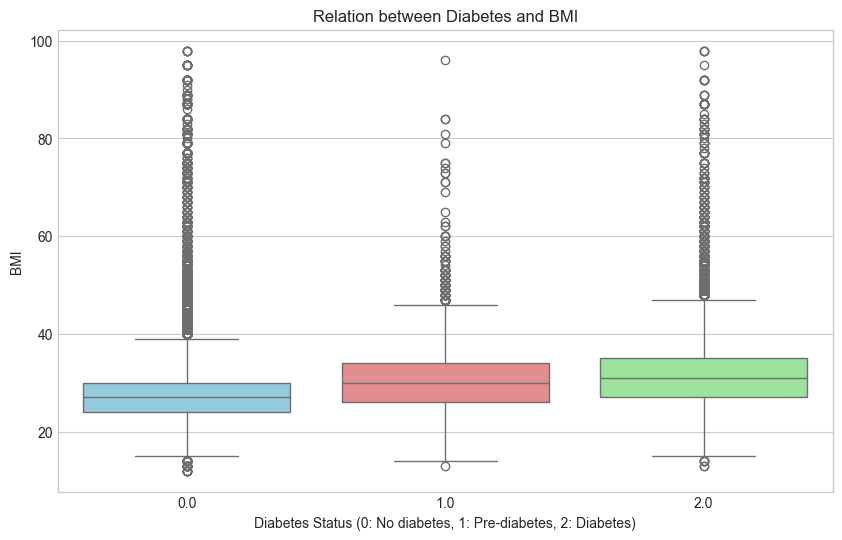

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_012', y='BMI', data=df, hue='Diabetes_012', palette=['skyblue', 'lightcoral', 'lightgreen'], legend=False)
plt.title('Relation between Diabetes and BMI')
plt.xlabel('Diabetes Status (0: No diabetes, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('BMI')
plt.show()

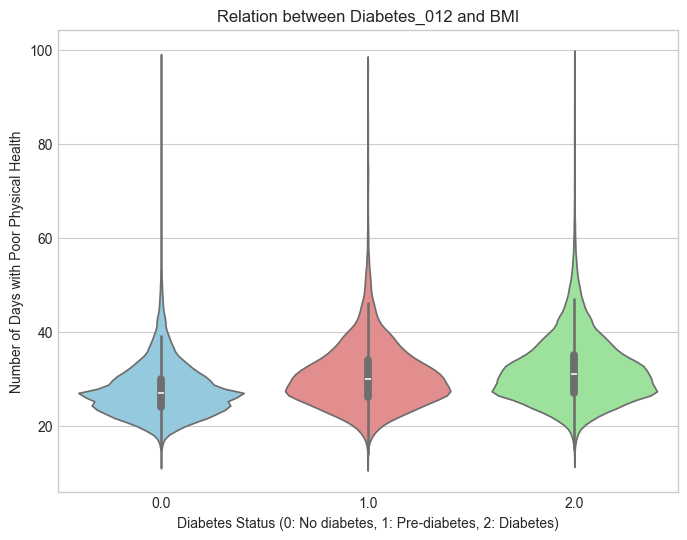

In [21]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='Diabetes_012', y='BMI', data=df, hue='Diabetes_012', palette=['skyblue', 'lightcoral', 'lightgreen'], legend=False)
plt.title('Relation between Diabetes_012 and BMI')
plt.xlabel('Diabetes Status (0: No diabetes, 1: Pre-diabetes, 2: Diabetes)')
plt.ylabel('Number of Days with Poor Physical Health')
plt.show()

Những người bị tiền tiểu đường/ tiểu đường có trung bình BMI cao hơn những người không bị tiểu đường. 

đa số người bị tiểu đường hoặc tiền tiểu đường nằm trong khoảng BMI từ [26,35] 


### Quan hệ tương tác của các biến giải thích với biến dự đoán

Kiểm tra các biến có tương quan mạnh với nhau:
- (GenHlth, PhysHlth), (PhysHlth, DiffWalk), (Education, Income), (GenHlth, DiffWalk), (MenthHlth, PhysHlth): tương quan thuận
- (GenHlth, Income), (DiffWalk, Income): tương quan nghịch


#### Định tính với định tính

<Figure size 1200x800 with 0 Axes>

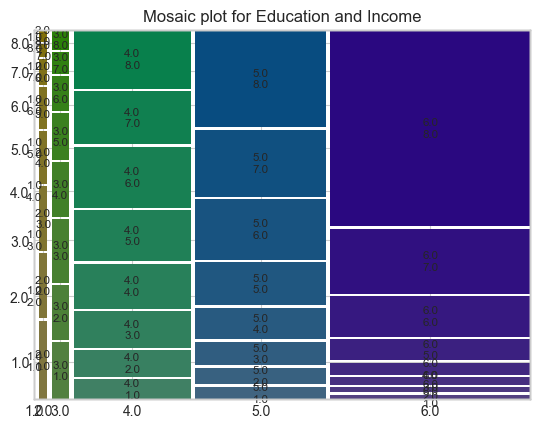

In [23]:
from statsmodels.graphics.mosaicplot import mosaic

contingency_table = pd.crosstab(df['Education'], df['Income'])

plt.figure(figsize=(12, 8))
mosaic(contingency_table.stack(), title='Mosaic plot for Education and Income', gap=0.01)
plt.xticks(rotation=90)
plt.show()

các ô màu đậm xuất hiện nhiều -> giá trị thực tế khác biệt với giá trị kỳ vọng -> có tương quan giữa 2 biến 

=> Các biểu đồ trên đều cho thấy có sự tương quan giữa 2 biến được xét

#### Định tính với định lượng

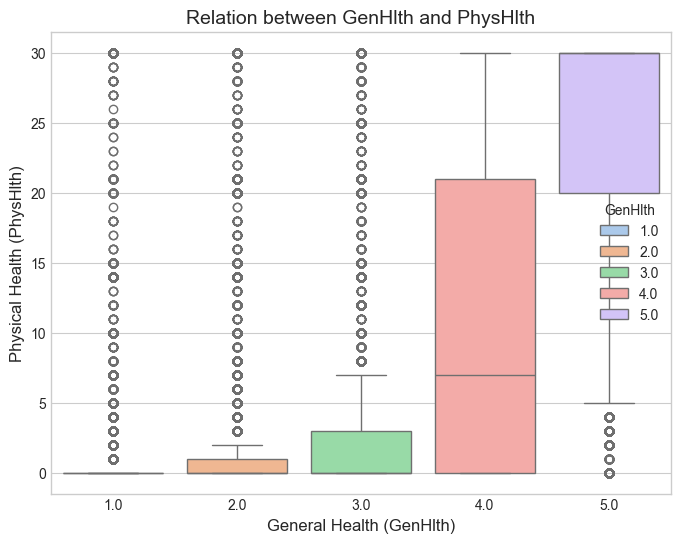

In [24]:
plt.figure(figsize=(8, 6)) 
sns.boxplot(data=df, x='GenHlth', y='PhysHlth', hue='GenHlth', palette='pastel')

plt.title("Relation between GenHlth and PhysHlth", fontsize=14)
plt.xlabel("General Health (GenHlth)", fontsize=12)
plt.ylabel("Physical Health (PhysHlth)", fontsize=12)

plt.show()

=> Phần lớn người có GenHlth đạt mức 1 thì không gặp vấn đề sức khỏe thể chất, GenHlth ở các mức tệ hơn thì có gặp vấn đề sức khỏe thể chất kéo dài, đặc biệt là GenHlth ở mức xấu nhất thì phần lớn mọi người gặp vấn đề thể chất kéo dài suốt 30 ngày (trung bình của boxplot ở 30). 


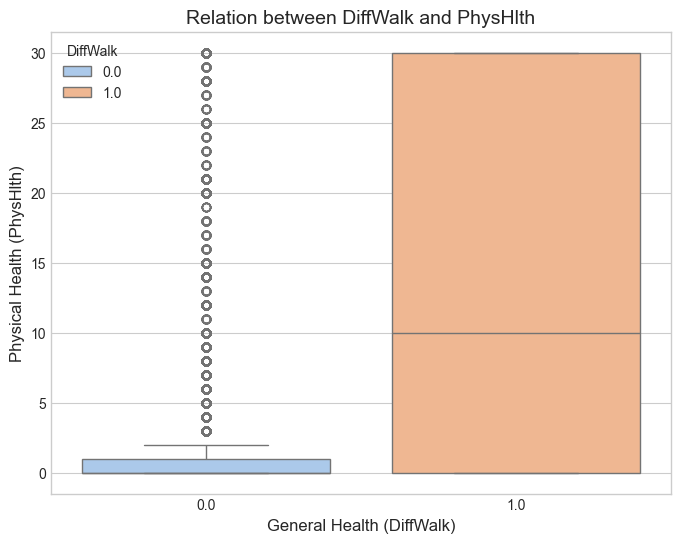

In [25]:
plt.figure(figsize=(8, 6))  
sns.boxplot(data=df, x='DiffWalk', y='PhysHlth', hue='DiffWalk', palette='pastel')

plt.title("Relation between DiffWalk and PhysHlth", fontsize=14)
plt.xlabel("General Health (DiffWalk)", fontsize=12)
plt.ylabel("Physical Health (PhysHlth)", fontsize=12)

plt.show()

=> Những người có vấn đề với việc đi lại cũng sẽ gặp vấn đề về thể chất. 

#### Định lượng với định lượng

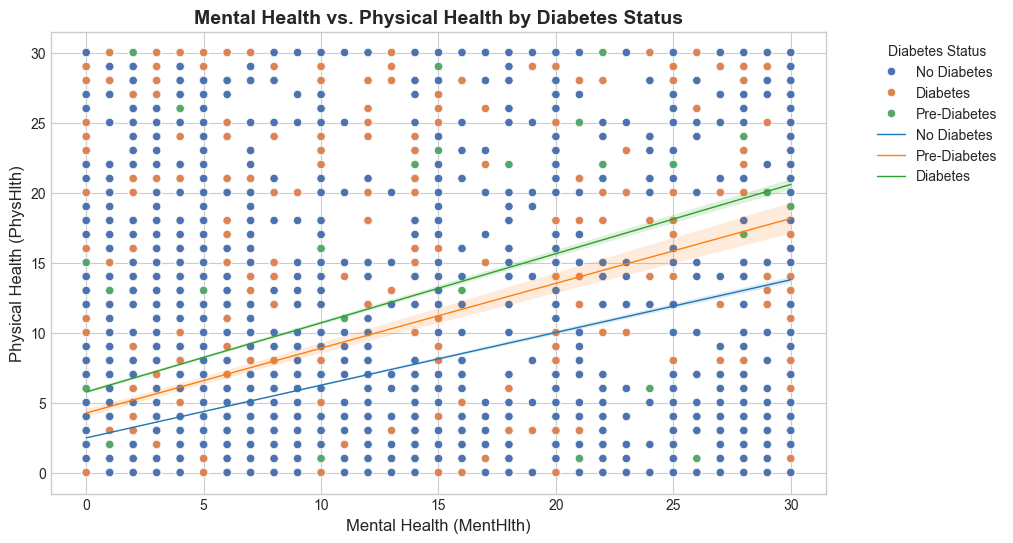

In [26]:
diabetes_labels = {0: "No Diabetes", 1: "Pre-Diabetes", 2: "Diabetes"}
df['Diabetes_012_Label'] = df['Diabetes_012'].map(diabetes_labels)

# Create scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MentHlth', y='PhysHlth', hue='Diabetes_012_Label', palette='deep')

for diabetes_status, data in df.groupby('Diabetes_012'):
  sns.regplot(data=data, x='MentHlth', y='PhysHlth', scatter=False, label=diabetes_labels[diabetes_status], line_kws={"linewidth":1})

plt.title("Mental Health vs. Physical Health by Diabetes Status", fontsize=14, fontweight='bold')
plt.xlabel("Mental Health (MentHlth)", fontsize=12)
plt.ylabel("Physical Health (PhysHlth)", fontsize=12)
plt.legend(title="Diabetes Status", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

=> Những người gặp vấn đề về sức khỏe tinh thần kéo dài thì cũng có khả năng gặp vấn đề về sức khỏe thể chất kéo dài.       
Trung bình số ngày gặp vấn đề sức khỏe của nhóm không tiểu đường thì thấp hơn so với nhóm tiền tiểu đường và tiểu đường.


### Kết luận sơ bộ sau khi khám phá dữ liệu


1 số biến có tương quan với nhau => có thể dẫn đến đa cộng tuyến => có thể ảnh hưởng đến logistic regression        

**Preprocessing:**       
Dữ liệu về số lượng người mắc bệnh tiểu đường và không mắc bệnh bị mất cân bằng nặng => xử lí imbalanced data.         
Các biến định lượng có chứa outliers => có thể dùng log transform/ robust scaling hoặc chia lại nhãn. 
- có thể chia nhãn dữ liệu lại: **Education**.
- có thể dùng Robust Scaling cho: **BMI, MentHlth và PhysHlth**.

*Không loại bỏ outliers được vì outliers của BMI có ý nghĩa trong dự đoán tiểu đường, outliers của MentHlth và PhysHlth thì > 10%.*

**Hypothesis Testing:** Các loại kiểm định có thể áp dụng với bộ dữ liệu:            
1. Kiểm định **Chi-square** giữa các biến định tính.
2. Kiểm định **ANOVA/ Kruskal-Wallis** giữa biến định lượng và định tính/ định lượng.

**Mục tiêu:** Dự đoán/Phân loại 1 người vào 1 trong 3 class: tiểu đường, tiền tiểu đường, không bị bệnh tiểu đường.            
Biến dự đoán: Diabetes_012.             
*Do dữ liệu mất cân bằng nên ưu tiên dự đoán người có khả năng tiền tiểu đường hoặc tiểu đường và chấp nhận các trường hợp dương tính giả.* 


## Data Cleaning

### Outliers

gom nhóm nhãn hiếm cho Education.       
1: Less than high school.       
2: High School.     
3: College.     
4: College gradute. 

In [35]:
# Group rare labels for Education
df['Education'] = np.where(df['Education'].isin([1, 2, 3]), 1, df['Education'])
df['Education'] = pd.Categorical(df['Education'].replace({4: 2, 5: 3, 6: 4}))

df['Education'] = df['Education'].astype(float)

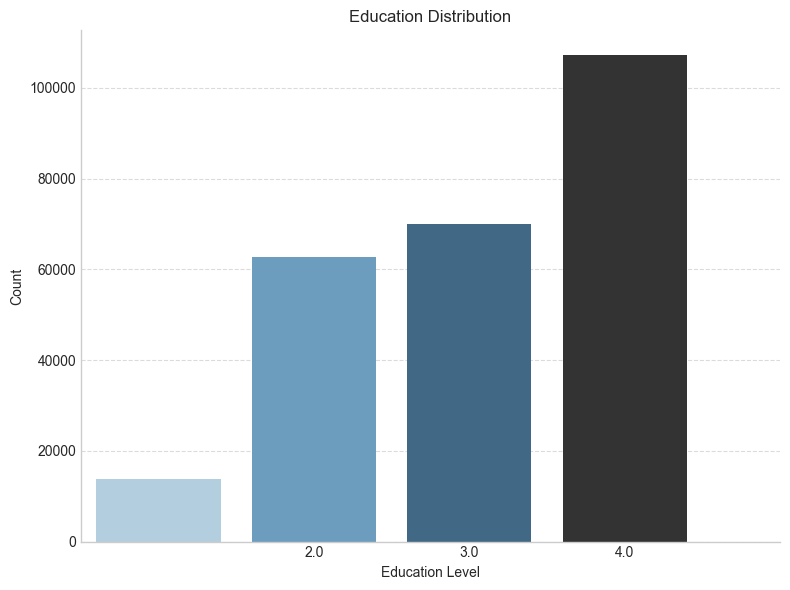

In [32]:
education_counts = df['Education'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.index, y=education_counts.values, hue=education_counts.index, palette='Blues_d', dodge=False, legend=False)

plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Education Distribution")
plt.xticks(education_counts.index)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Scale lại toàn bộ dữ liệu cho các biến định lượng để giảm ảnh hưởng của outliers trong quá trình kiểm định giả thuyết. 


In [36]:
def robust_scaler(x):
    Q1 = np.quantile(x, 0.25)
    Q3 = np.quantile(x, 0.75)
    IQR = Q3 - Q1
    median_x = np.median(x)

    scaled_x = (x - median_x) / IQR
    return scaled_x

# Áp dụng robust_scaler cho các cột
df1[['BMI', 'PhysHlth', 'MentHlth']] = df[['BMI', 'PhysHlth', 'MentHlth']].apply(robust_scaler)

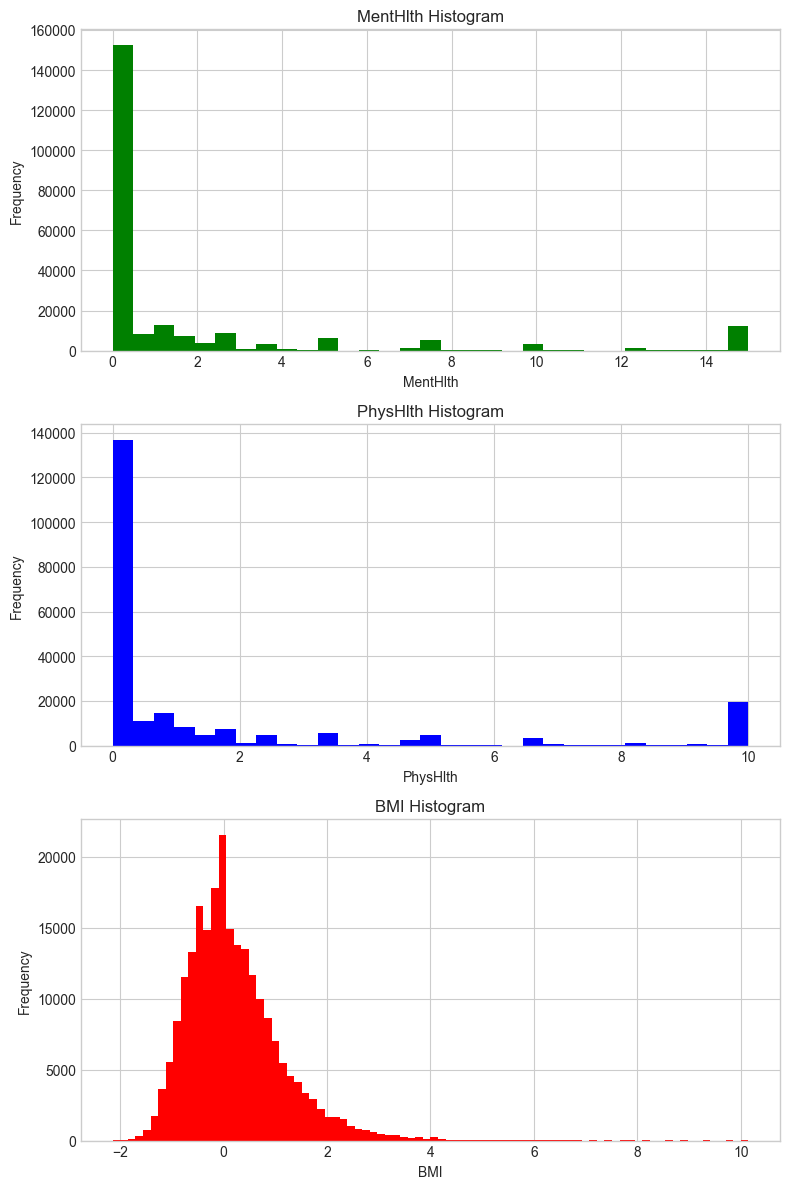

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12), facecolor='white')
cols = ['MentHlth', 'PhysHlth', 'BMI']
colors = ['green', 'blue', 'red']
bins = [31, 31, 84]

for i, col in enumerate(cols):
    axes[i].hist(df1[col], bins=bins[i], color=colors[i])
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [38]:
df1.to_csv('../data/clean_outliers.csv', index=False)

Drop duplicate rows và chia dữ liệu train test cho quá trình xây dựng mô hình 


In [41]:
from sklearn.model_selection import train_test_split

df2 = df.drop_duplicates()
train, test = train_test_split(df2, test_size=0.3, random_state=345)

print(f"Train data: ")
print(train['Diabetes_012'].value_counts().sort_index())
print(f"Test data: ")
print(test['Diabetes_012'].value_counts().sort_index())

Train data: 
Diabetes_012
0.0    133105
1.0      3254
2.0     24480
Name: count, dtype: int64
Test data: 
Diabetes_012
0.0    56942
1.0     1375
2.0    10615
Name: count, dtype: int64


In [47]:
median_summary = train[['BMI', 'MentHlth', 'PhysHlth']].median()
iqr_summary = train[['BMI', 'MentHlth', 'PhysHlth']].apply(lambda x: np.percentile(x, 75) - np.percentile(x, 25))
train_summary = pd.DataFrame({'median': median_summary, 'IQR': iqr_summary}).reset_index()

print(train_summary)

      index  median  IQR
0       BMI    27.0  8.0
1  MentHlth     0.0  2.0
2  PhysHlth     0.0  4.0


In [ ]:
train_summary.to_csv('../data/scale_parameters.csv', index=False)

In [48]:
def robust_scaler2(x, IQR, median):
    scaled_x = (x - median) / IQR
    return scaled_x

variables = ["BMI", "MentHlth", "PhysHlth"]
for var in variables:
    median_value = train_summary.loc[train_summary['index'] == var, 'median'].values[0]
    iqr_value = train_summary.loc[train_summary['index'] == var, 'IQR'].values[0]
    train[var] = robust_scaler2(train[var], iqr_value, median_value)
    test[var] = robust_scaler2(test[var], iqr_value, median_value)


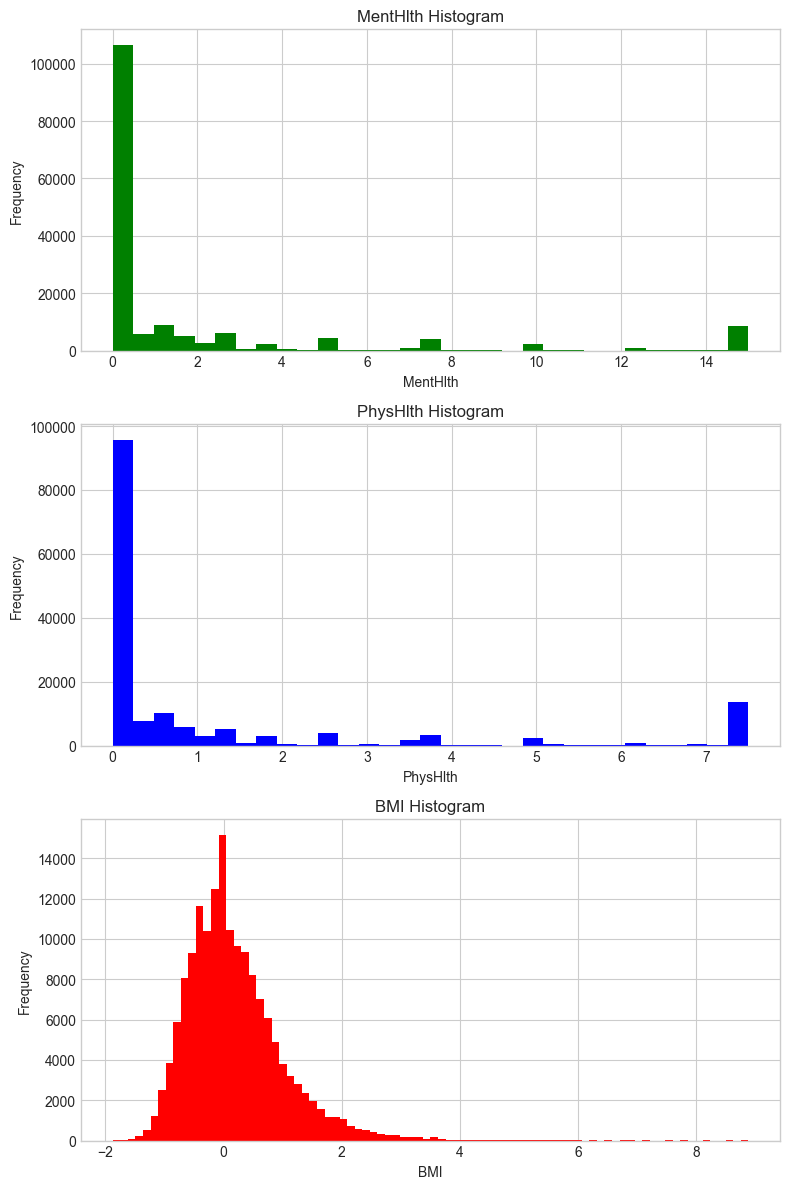

In [49]:
fig, axes = plt.subplots(3, 1, figsize=(8, 12), facecolor='white')
cols = ['MentHlth', 'PhysHlth', 'BMI']
colors = ['green', 'blue', 'red']
bins = [31, 31, 84]

for i, col in enumerate(cols):
    axes[i].hist(train[col], bins=bins[i], color=colors[i])
    axes[i].set_title(f'{col} Histogram')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
train.to_csv('../data/train_set/train_base.csv', index=False)
test.to_csv('../data/testset.csv', index=False)

### Imbalanced 

In [ ]:
train = pd.read_csv('../data/train_set/train_base.csv')

In [51]:
def under_sampling(data, name_class):
    class_counts = data[name_class].value_counts()
    n_minor = class_counts.min()
    undersampled_data = []

    for class_label in class_counts.index:
        class_data = data[data[name_class] == class_label]
        sampled_data = class_data.sample(n=n_minor, random_state=42)
        undersampled_data.append(sampled_data)

    new_data = pd.concat(undersampled_data, ignore_index=True)
    return new_data


In [52]:
train_under = under_sampling(train, "Diabetes_012")
print(train_under['Diabetes_012'].value_counts().sort_index())

Diabetes_012
0.0    3254
1.0    3254
2.0    3254
Name: count, dtype: int64


In [ ]:
train_under.to_csv('../data/train_set/train_under.csv', index=False)

In [50]:
def over_sampling(data, name_class):
    class_counts = data[name_class].value_counts()
    n_major = class_counts.max()
    oversampled_data = []

    for class_label in class_counts.index:
        class_data = data[data[name_class] == class_label]
        sampled_data = class_data.sample(n=n_major, replace=True, random_state=42)
        oversampled_data.append(sampled_data)

    new_data = pd.concat(oversampled_data, ignore_index=True)
    return new_data


In [53]:
train_over = over_sampling(train, "Diabetes_012")
print(train_over['Diabetes_012'].value_counts().sort_index())

Diabetes_012
0.0    133105
1.0    133105
2.0    133105
Name: count, dtype: int64


In [ ]:
train_over.to_csv('../data/train_set/train_over.csv', index=False)

In [54]:
def combine_sampling(data, name_class):
    class_counts = data[name_class].value_counts()
    n_avg = round(class_counts.mean())
    combined_data = []

    for class_label in class_counts.index:
        class_data = data[data[name_class] == class_label]
        n_class_data = len(class_data)

        if n_class_data < n_avg:
            id_sample = np.random.choice(class_data.index, size=n_avg - n_class_data, replace=True)
            class_data = pd.concat([class_data, class_data.loc[id_sample]])
        else:
            id_sample = np.random.choice(class_data.index, size=n_avg, replace=False)
            class_data = class_data.loc[id_sample]

        combined_data.append(class_data)

    new_data = pd.concat(combined_data, ignore_index=True)

    return new_data


In [55]:
train_combine = combine_sampling(train, "Diabetes_012")
print(train_combine['Diabetes_012'].value_counts().sort_index())

Diabetes_012
0.0    53613
1.0    53613
2.0    53613
Name: count, dtype: int64


In [ ]:
train_combine.to_csv('../data/train_set/train_combine.csv', index=False)

## Hypothesis Testing 

In [3]:
df = pd.read_csv('../data/clean_outliers.csv')

In [4]:
import scipy.stats as stats

def chisq_test(df, var1, var2):
    observed = pd.crosstab(df[var1], df[var2])
    chisq = stats.chi2_contingency(observed)
    return chisq

def kruskal_test(df, var1, var2):
    groups = [df[df[var2] == group][var1] for group in df[var2].unique()]
    kruskal = stats.kruskal(*groups)
    return kruskal

### Biến giải thích với predictor

In [62]:
df_category = df.drop(columns=['BMI', 'MentHlth', 'PhysHlth', 'Diabetes_012'])

vars = df_category.columns

chi_square_results = pd.DataFrame(columns=['variable', 'p_value', 'reject'])

for var in vars:
    chi_square = chisq_test(df, 'Diabetes_012', var)
    reject = chi_square[1] < 0.05
    chi_square_results = pd.concat([chi_square_results, pd.DataFrame({'variable': [var], 'p_value': [chi_square[1]], 'reject': [reject]})], ignore_index=True)

chi_square_results


C:\Users\Ngoc\AppData\Local\Temp\ipykernel_15096\500222870.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  chi_square_results = pd.concat([chi_square_results, pd.DataFrame({'variable': [var], 'p_value': [chi_square[1]], 'reject': [reject]})], ignore_index=True)


,variable,p_value,reject
0,HighBP,0.000000e+00,True
1,HighChol,0.000000e+00,True
2,CholCheck,2.408557e-291,True
3,Smoker,5.168483e-110,True
4,Stroke,0.000000e+00,True
5,HeartDiseaseorAttack,0.000000e+00,True
6,PhysActivity,0.000000e+00,True
7,Fruits,4.423744e-33,True
8,Veggies,1.678140e-95,True
9,HvyAlcoholConsump,8.000283e-226,True


In [63]:
# kruskal test for vars_quantitative = {BMI, MentHlth, PhysHlth}
vars_quantitative = ['BMI', 'MentHlth', 'PhysHlth']

kruskal_results = pd.DataFrame(columns=['variable', 'p_value', 'reject'])

for var in vars_quantitative:
    kruskal = kruskal_test(df, var, 'Diabetes_012')
    reject = kruskal[1] < 0.05
    kruskal_results = pd.concat([kruskal_results, pd.DataFrame({'variable': [var], 'p_value': [kruskal[1]], 'reject': [reject]})], ignore_index=True)

kruskal_results

C:\Users\Ngoc\AppData\Local\Temp\ipykernel_15096\2648414599.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kruskal_results = pd.concat([kruskal_results, pd.DataFrame({'variable': [var], 'p_value': [kruskal[1]], 'reject': [reject]})], ignore_index=True)


,variable,p_value,reject
0,BMI,0.000000e+00,True
1,MentHlth,5.537223e-28,True
2,PhysHlth,0.000000e+00,True


### Kết luận

Sau quá trình kiểm định quan hệ giữa các biến, ta có được các nhận xét:
- Tất cả các biến giải thích đều có đóng góp vào mô hình.
- Đa số các biến giải thích có mối quan hệ tương quan, điều này làm mô hình khả năng rất cao bị đa cộng tuyến. 
Tuy nhiên nếu loại bỏ hết đa cộng tuyến thì giảm hiệu suất mô hình do mâu thuẫn với nhận xét 1. 


## Models 

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [9]:
def predict_and_plot(model, inputs, targets, name=''):
    preds = model.predict(inputs)
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name))
    
    return preds

In [11]:
train = pd.read_csv('../data/train_set/train_combine.csv')
test = pd.read_csv('../data/testset.csv')

X_train = train.drop(columns=['Diabetes_012'])
Y_train = train['Diabetes_012']
X_test = test.drop(columns=['Diabetes_012'])
Y_test = test['Diabetes_012']

In [12]:
log_reg = LogisticRegression(C=1, penalty='l2', solver='liblinear', max_iter=1500)
log_reg.fit(X_train, Y_train)

LogisticRegression(C=1, max_iter=1500, solver='liblinear')

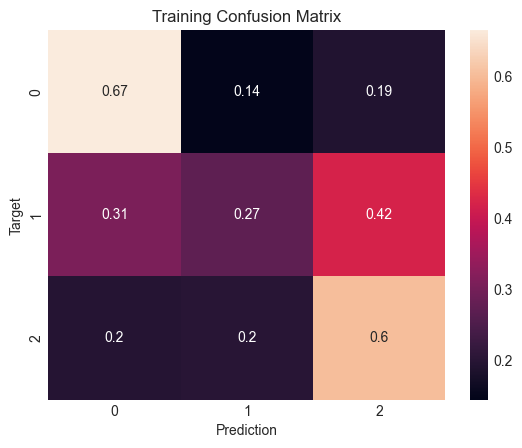

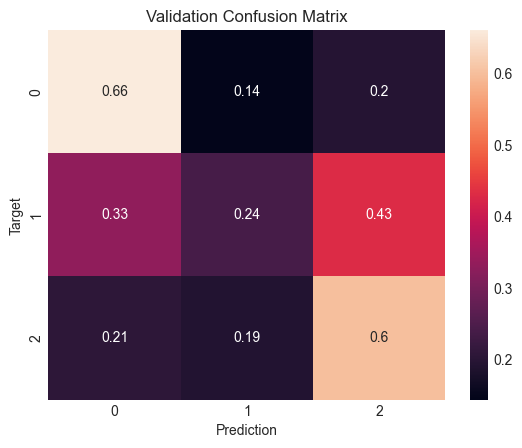

In [13]:
train_preds = predict_and_plot(log_reg, X_train, Y_train, 'Training')
val_preds = predict_and_plot(log_reg, X_test, Y_test, 'Validation')

In [14]:
print(classification_report(Y_train, train_preds))

              precision    recall  f1-score   support

           0       0.57      0.67      0.61     53613
           1       0.44      0.27      0.34     53613
           2       0.50      0.60      0.55     53613

    accuracy                           0.51    160839
   macro avg       0.50      0.51      0.50    160839
weighted avg       0.50      0.51      0.50    160839



In [15]:
print(classification_report(Y_test, val_preds))

              precision    recall  f1-score   support

           0       0.93      0.66      0.77     56978
           1       0.03      0.24      0.06      1380
           2       0.35      0.60      0.44     10574

    accuracy                           0.64     68932
   macro avg       0.44      0.50      0.42     68932
weighted avg       0.83      0.64      0.71     68932



In [16]:
# random forest
rf = RandomForestClassifier(n_estimators=150, criterion="entropy", max_depth=6, random_state=12)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, n_estimators=150,
                       random_state=12)

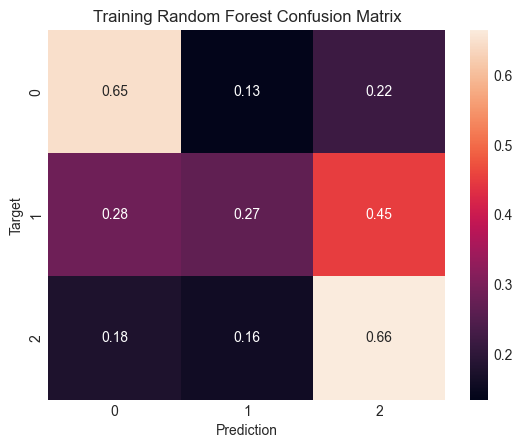

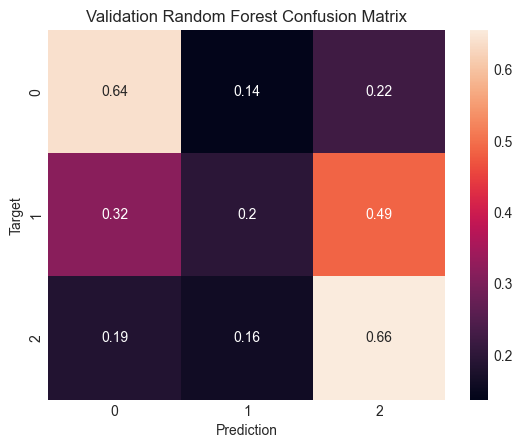

In [17]:
train_preds_rf = predict_and_plot(rf, X_train, Y_train, 'Training Random Forest')
val_preds_rf = predict_and_plot(rf, X_test, Y_test, 'Validation Random Forest')

In [18]:
print(classification_report(Y_train, train_preds_rf))

              precision    recall  f1-score   support

           0       0.58      0.65      0.61     53613
           1       0.48      0.27      0.34     53613
           2       0.50      0.66      0.57     53613

    accuracy                           0.53    160839
   macro avg       0.52      0.53      0.51    160839
weighted avg       0.52      0.53      0.51    160839



In [19]:
print(classification_report(Y_test, val_preds_rf))

              precision    recall  f1-score   support

           0       0.94      0.64      0.76     56978
           1       0.03      0.20      0.05      1380
           2       0.34      0.66      0.45     10574

    accuracy                           0.63     68932
   macro avg       0.44      0.50      0.42     68932
weighted avg       0.83      0.63      0.70     68932



In [24]:
# xgboost
xgb = XGBClassifier(n_estimators=100, max_depth=4, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, random_state=12)

xgb.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

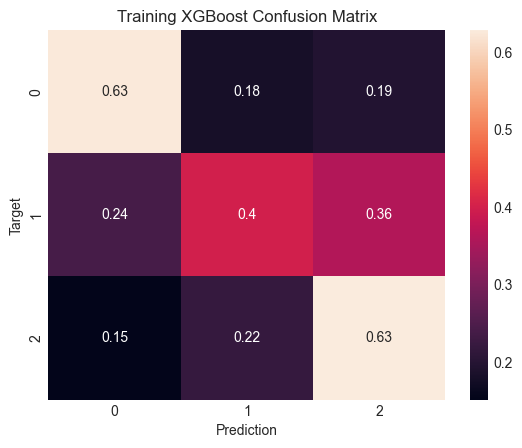

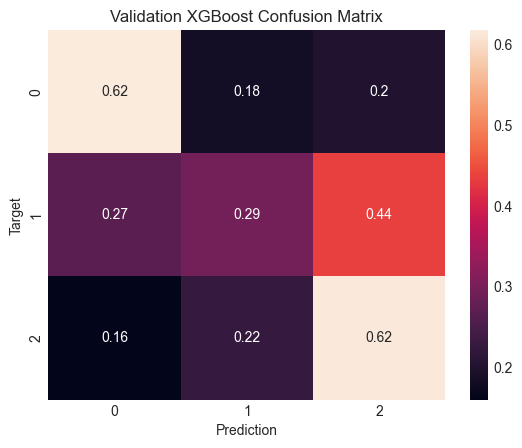

In [25]:
train_preds_xgb = predict_and_plot(xgb, X_train, Y_train, 'Training XGBoost')
val_preds_xgb = predict_and_plot(xgb, X_test, Y_test, 'Validation XGBoost')

In [26]:
print(classification_report(Y_train, train_preds_xgb))

              precision    recall  f1-score   support

           0       0.61      0.63      0.62     53613
           1       0.50      0.40      0.44     53613
           2       0.53      0.63      0.58     53613

    accuracy                           0.55    160839
   macro avg       0.55      0.55      0.55    160839
weighted avg       0.55      0.55      0.55    160839



In [27]:
print(classification_report(Y_test, val_preds_xgb))

              precision    recall  f1-score   support

           0       0.94      0.62      0.75     56978
           1       0.03      0.29      0.06      1380
           2       0.35      0.62      0.45     10574

    accuracy                           0.61     68932
   macro avg       0.44      0.51      0.42     68932
weighted avg       0.84      0.61      0.69     68932

